In [5]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

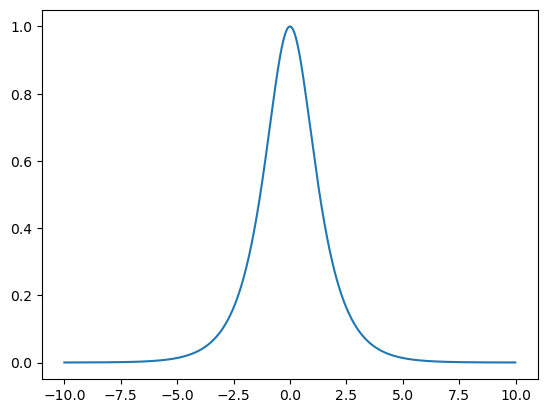

In [6]:
dx = 0.01
L = 20
x = np.arange(-L/2,L/2,dx)
f = 1/np.cosh(x) # sech
plt.plot(x, f)

In [7]:
def runge_kutta4_step(yk, f, tk,dt):
    f1 = f(tk, yk)
    f2 = f(tk + dt / 2, yk + dt / 2 * f1)
    f3 = f(tk + dt / 2, yk + dt / 2 * f2)
    f4 = f(tk + dt, yk + dt * f3)
    return yk + dt/6 * (f1 + 2 * f2 + 2 * f3 + f4)

In [8]:
def rhs_lweq(t, u):
    Nx = len(u)
    uhat = np.fft.fft(u)
    kap = 2*np.pi/L * np.arange(-Nx/2,Nx/2,1)
    kap = np.fft.fftshift(kap)
    duhat = 1j*kap*uhat
    du = np.fft.ifft(duhat)
    return -du

Text(0.5, 0.98, 'Solution for linear wave equation')

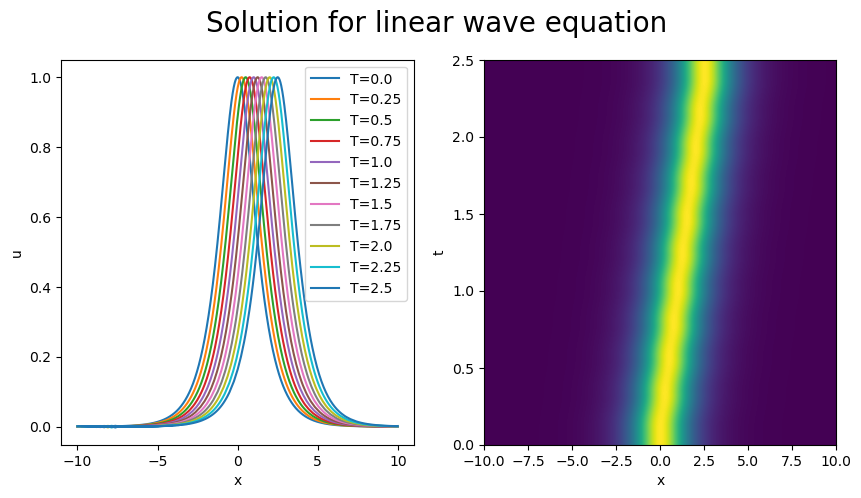

In [19]:
dt = 0.025
t0 = 0
tbound = dt*100
sol = scp.integrate.solve_ivp(rhs_lweq, (0, tbound), f, t_eval=np.arange(t0,tbound+tbound/10,tbound/10))
u = sol.y.T.real
t = sol.t
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
for i in range(len(u)) : 
    ax[0].plot(x, u[i], label=f"T={round(t[i],2)}")
ax[1].imshow(u, origin='lower',extent=[-L/2,L/2,t[0],t[-1]],aspect='auto')
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("u")
ax[1].set_xlabel("x")
ax[1].set_ylabel("t")
fig.suptitle("Solution for linear wave equation", fontsize=20)

In [ ]:
def rhs_burgers(t, u):
    Nx = len(u)
    uhat = np.fft.fft(u)
    kap = 2*np.pi/L * np.arange(-Nx/2,Nx/2,1)
    kap = np.fft.fftshift(kap)
    duhat = 1j*kap*uhat
    dduhat = -(kap**2)*uhat # u_xx term
    du = np.fft.ifft(duhat)
    ddu = np.fft.ifft(dduhat)
    return -u*du + 0.01*ddu

c:\msys64\mingw64\lib\python3.11\site-packages\scipy\integrate\_ivp\base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


Text(0.5, 0.98, "Solution for Burger's equation")

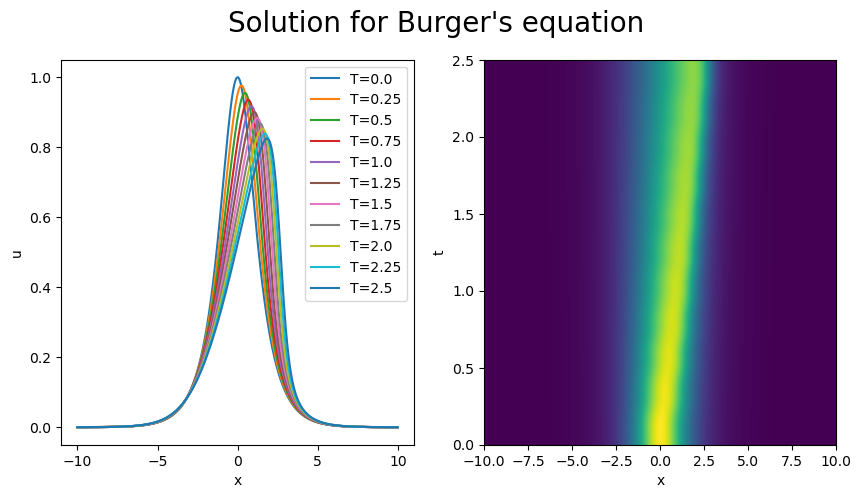

In [18]:
dt = 0.025
t0 = 0
tbound = dt*100
sol = scp.integrate.solve_ivp(rhs_burgers, (0, tbound), f, t_eval=np.arange(t0,tbound+tbound/10,tbound/10))
u = sol.y.T.real
t = sol.t
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
for i in range(len(u)) : 
    ax[0].plot(x, u[i], label=f"T={round(t[i],2)}")
ax[1].imshow(u, origin='lower',extent=[-L/2,L/2,t[0],t[-1]],aspect='auto')
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("u")
ax[1].set_xlabel("x")
ax[1].set_ylabel("t")
fig.suptitle("Solution for Burger's equation", fontsize=20)